# Kaggle begining : Housing Price competition

This notebook's goal is to predict the price for each house in the Kaggle test set, through the variable *SalePrice*.

Metrics : 
> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Competion website [here](https://www.kaggle.com/competitions/home-data-for-ml-course/overview)

## General Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 1500)
pd.set_option('display.max_column', 81)

In [3]:
data =  pd.read_csv('data/train.csv') 
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

## Exploratory Data Analysis 

**Goal :** Understand data
EDA can be begin on the Kaggle website in the *Data* tab.

**Form :**
- **Target variable :** *SalePrice*
- **Lines and columns :** 1460 rows × 81 columns
- **Variables' type :** 38 numerical, 43 object
- **Missings data :**
    - Some variables with many NaN. With a look on variables descriptions, and variables types/values, we understand it is relative to a missing option in the house. I think it is better to replace it with a 'None' str tag.
    - Seems to havee 2 groups base on variables' missings :
        - *basement* with 0.025 to 0.027 % of missings (BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure)
        - *garage* with 0.055479 % of missings (GarageQual, GarageFinish, GarageYrBlt, GarageType, GarageCond)

**Content :**
- **Target visualisation :** IQR = 163,000 [129,975 ; 214,000]. Some outliers, in particular after 500,000.
- **Variables signification :**
    - Numericals : 
        - Not standardized data
        - Many variables are disretized
        - Gaussian lookalike curves with sometimes peak in 0 and often skewed
    - Objects :
        - With only one category represented : *Street, Utilities*
        - Some variables seems to have poor categories variations
            - Try to binarize ? Major category / others ?
            - For *Condition1* and *Condition2* : merge ? Keep only first ? 
    - For more : cf *data_description.txt*
- **Variables/Target relations :**
    - Surface (F1, full basement, garage, GrLivArea) seems to influence target
    - Quality (OverallQual, BsmtCond) seems to influence target
    - Some periodicity (sale (june), remodel, construction)
    - Some poor corelate variables
    - => majority of object variables seems to influence target -> **test influences with univariate regression**

**Advanced part :**
- **Variables/Variables relations :**
- **NaN advanced :**
- **Hypothesis** (H0) :

**Conclusion :**

### Form

In [4]:
df_eda = data.copy(deep=True)

In [5]:
df_eda.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df_eda.shape

(1460, 81)

<Axes: >

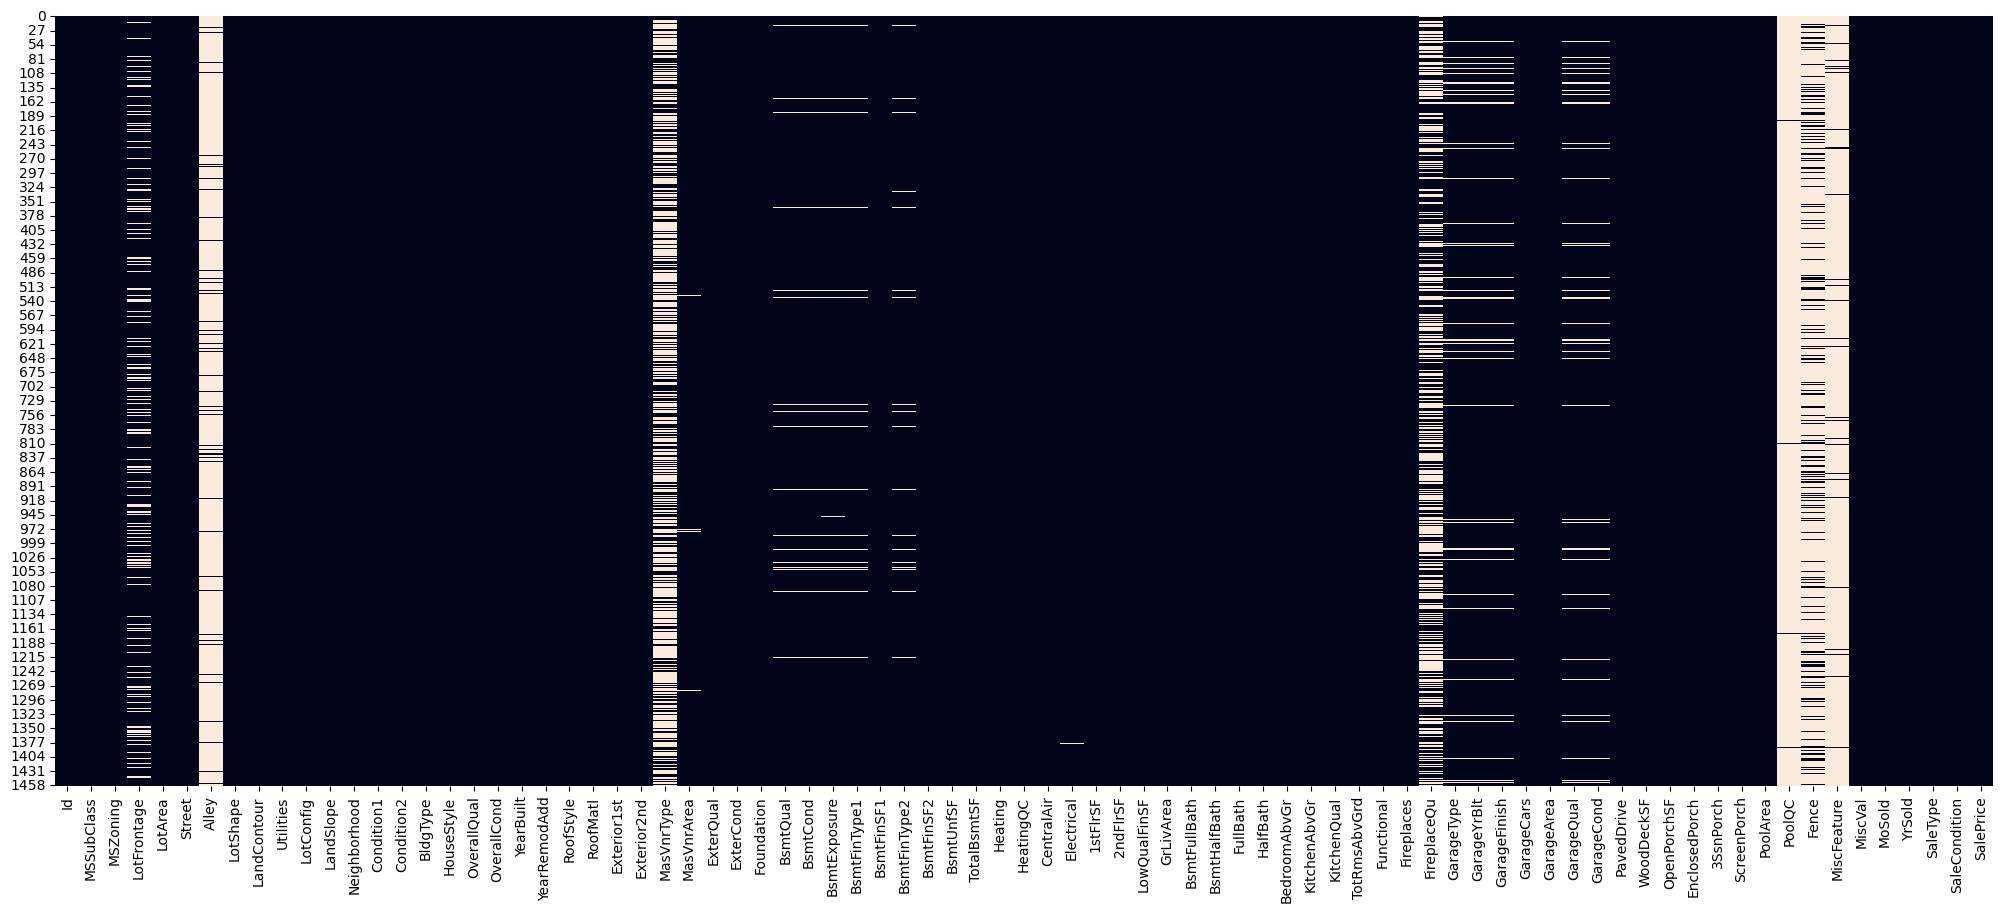

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(df_eda.isna(), cbar=False)

In [8]:
(df_eda.isna().sum()/df_eda.shape[0]).sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Utilities        0.000000
LandContour      0.000000
Neighborhood

In [9]:
for col in df_eda.columns[(df_eda.isna().sum() > 0)] :
    print(f'{col :-<20} {df_eda[col].dtypes}')

LotFrontage--------- float64
Alley--------------- object
MasVnrType---------- object
MasVnrArea---------- float64
BsmtQual------------ object
BsmtCond------------ object
BsmtExposure-------- object
BsmtFinType1-------- object
BsmtFinType2-------- object
Electrical---------- object
FireplaceQu--------- object
GarageType---------- object
GarageYrBlt--------- float64
GarageFinish-------- object
GarageQual---------- object
GarageCond---------- object
PoolQC-------------- object
Fence--------------- object
MiscFeature--------- object


In [10]:
tmp = list(df_eda['LotFrontage'].value_counts(sort=False).index)
tmp.sort()
tmp

[21.0,
 24.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 116.0,
 118.0,
 120.0,
 121.0,
 122.0,
 124.0,
 128.0,
 129.0,
 130.0,
 134.0,
 137.0,
 138.0,
 140.0,
 141.0,
 144.0,
 149.0,
 150.0,
 152.0,
 153.0,
 160.0,
 168.0,
 174.0,
 182.0,
 313.0]

We can see NaN values are only for non existing options and correspondings variables. For *LotFrontage* it's confirmed by the absence of 0.

### Content
#### Removing useless columns

For now, we can keep all columns except Id

In [11]:
df_eda = df_eda.drop('Id', axis=1)
df_eda.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

#### Target Visualization

<Axes: xlabel='SalePrice', ylabel='Density'>

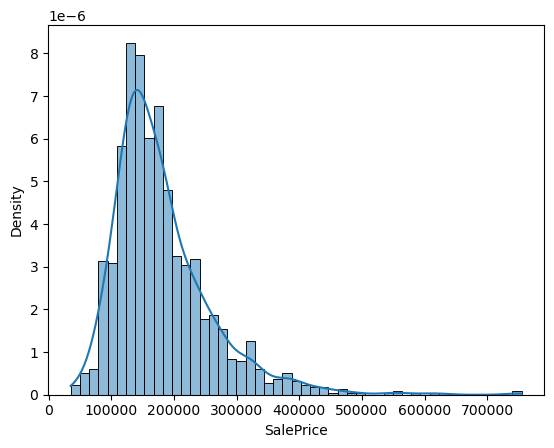

In [12]:
 sns.histplot(df_eda['SalePrice'], kde=True, stat="density")

In [13]:
df_eda['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='SalePrice'>

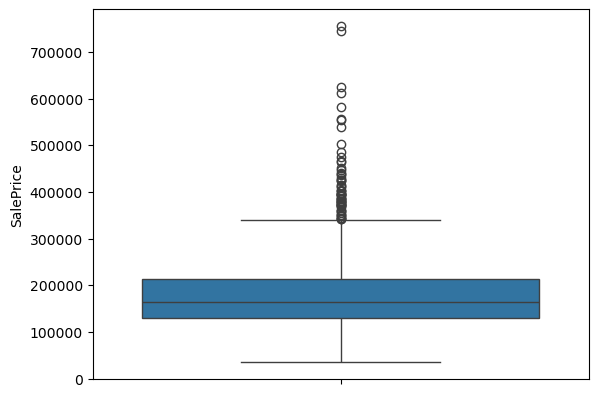

In [14]:
sns.boxplot(data=df_eda['SalePrice'])

#### Variables visualization

In [15]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    plt.figure()
    sns.histplot(df_eda[col], kde=True, stat="density")
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    plt.figure()\n    sns.histplot(df_eda[col], kde=True, stat="density")\n'

In [16]:
"""
def get_lbl(vc):
    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]

for col in df_eda.select_dtypes(['object']):
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title=col)
"""

"\ndef get_lbl(vc):\n    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]\n\nfor col in df_eda.select_dtypes(['object']):\n    plt.figure()\n    vc = df_eda[col].value_counts(normalize=True)\n    vc.plot.pie(labels=get_lbl(vc), title=col)\n"

#### Relation Var/Target
##### Sub groups creation

In [17]:
basement_nan = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']

In [18]:
basement = list(df_eda.columns[df_eda.columns.str.contains('Bsmt')])
basement

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [19]:
garage_nan = ['GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond']

In [20]:
garage = list(df_eda.columns[df_eda.columns.str.contains('Garage')])
garage

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [21]:
all_var_cols = df_eda.columns
all_var_cols = all_var_cols.drop('SalePrice')

___

In [22]:
"""
for col in all_var_cols:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in all_var_cols:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

In [ ]:
#for col in df_eda.select_dtypes(['int64','float64']):
    #sns.relplot(data=df_eda, kind="line", x=col, y='SalePrice', errorbar="sd")

In [23]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    sns.jointplot(data=df_eda, x=col, y='SalePrice', kind="kde", fill=True)
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    #sns.relplot(data=df_eda, kind="line", x=col, y=\'SalePrice\', errorbar="sd")\n    #sns.relplot(data=df_eda, x=col, y=\'SalePrice\')\n    sns.jointplot(data=df_eda, x=col, y=\'SalePrice\', kind="kde", fill=True)\n'

/tmp/ipykernel_3497/2257930499.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


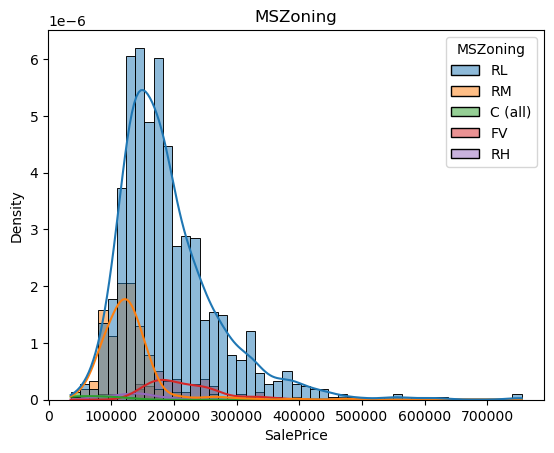

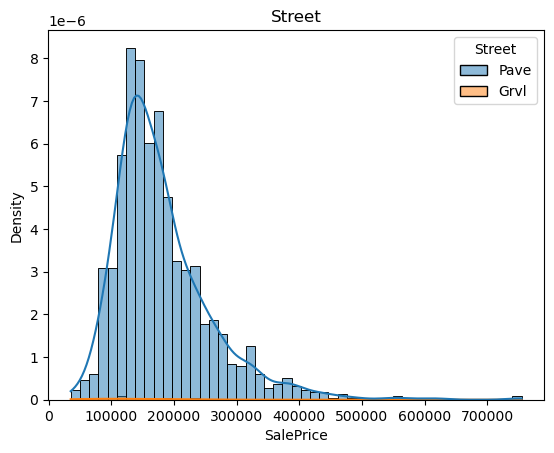

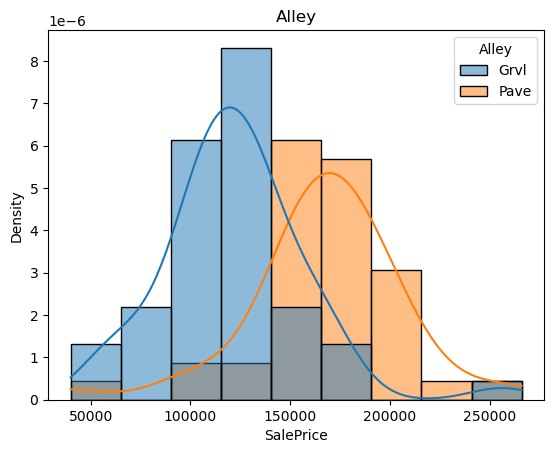

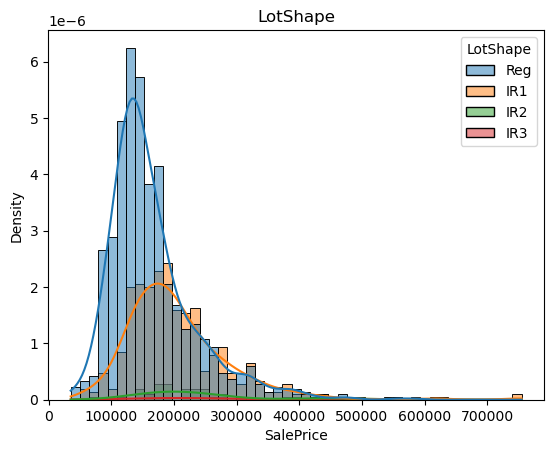

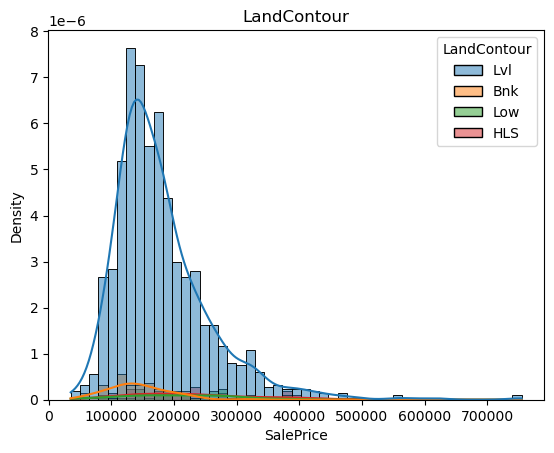

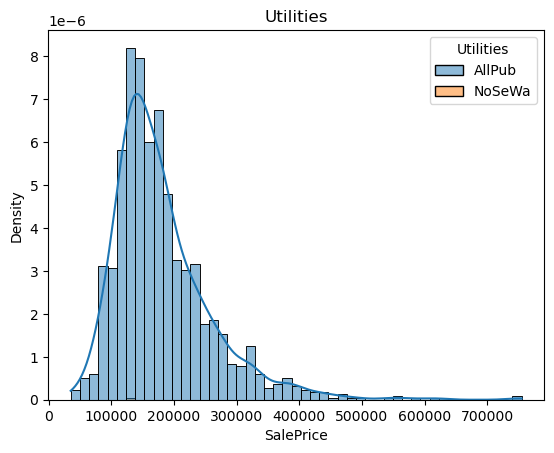

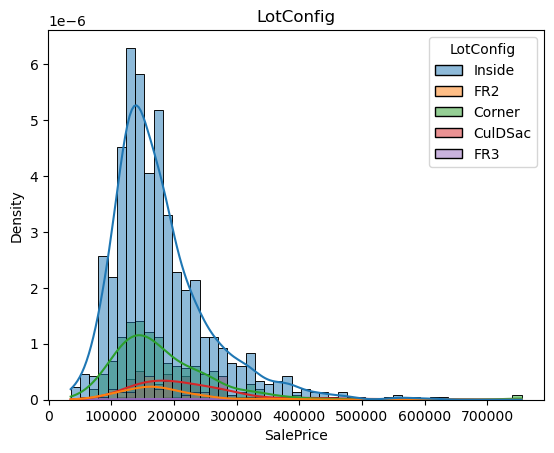

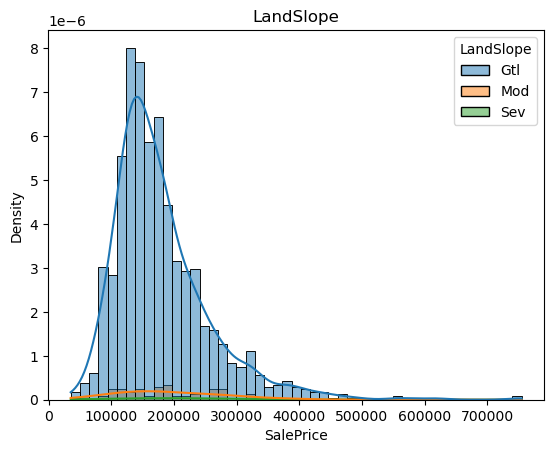

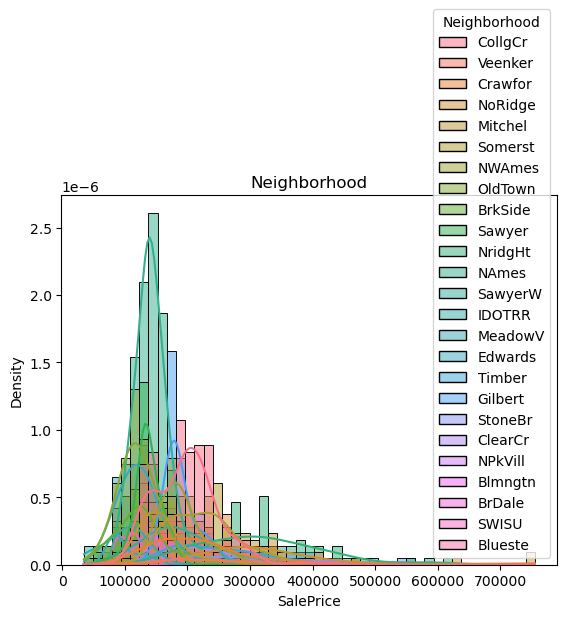

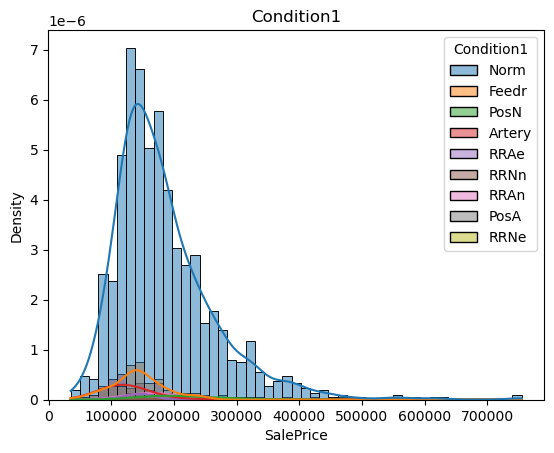

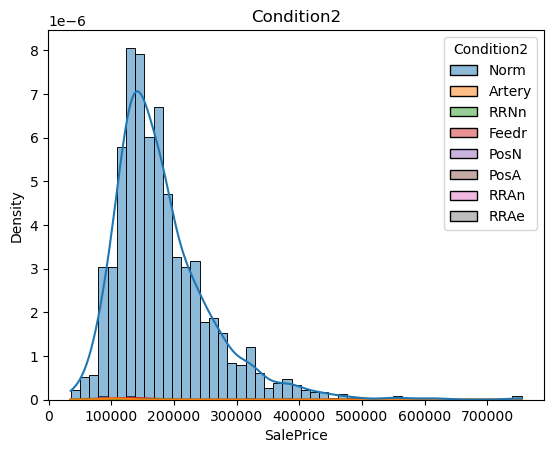

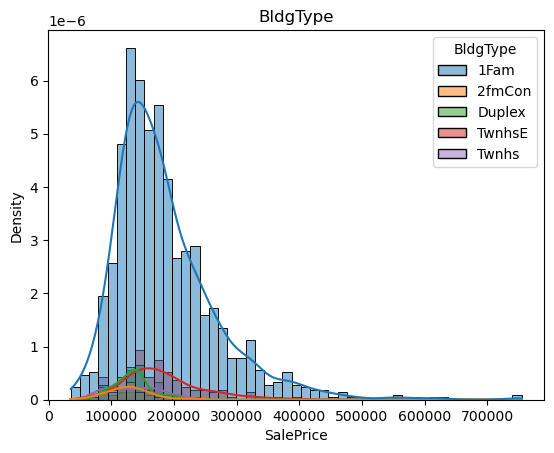

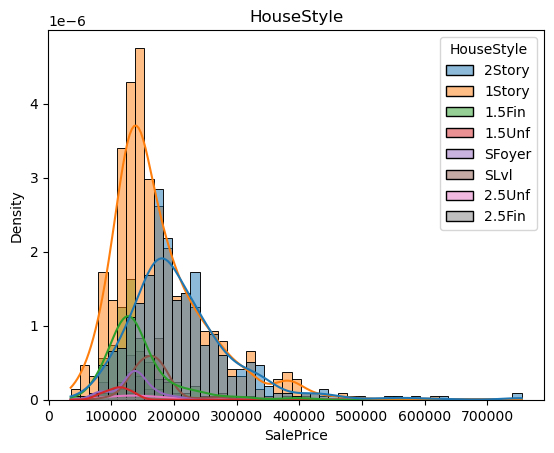

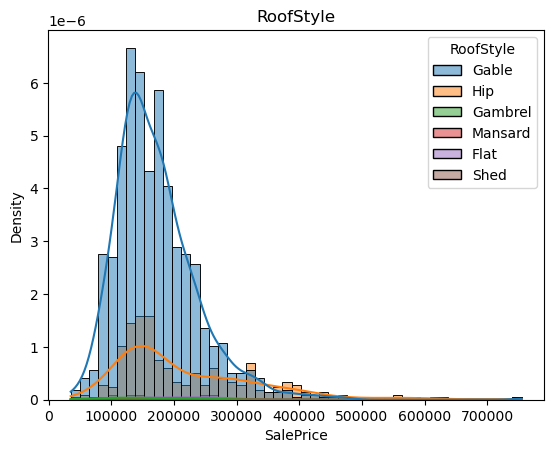

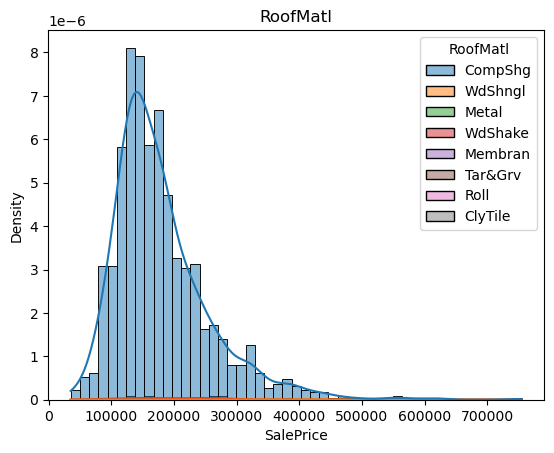

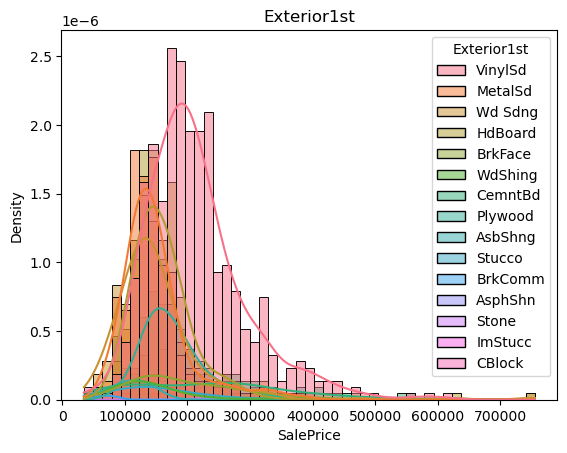

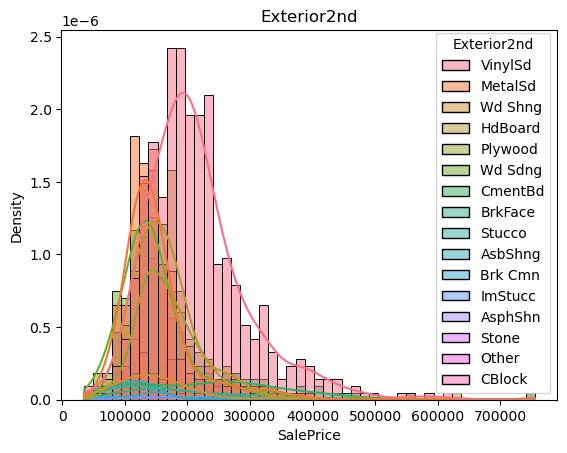

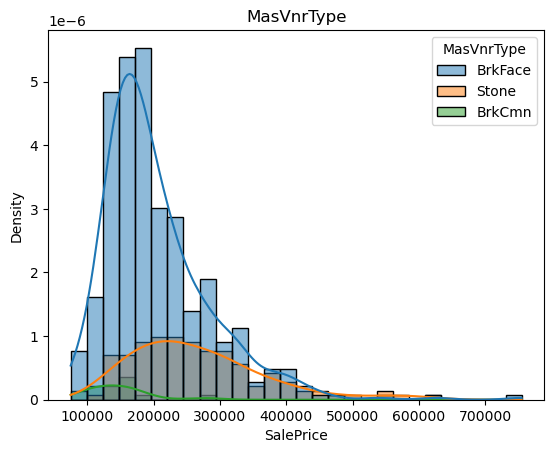

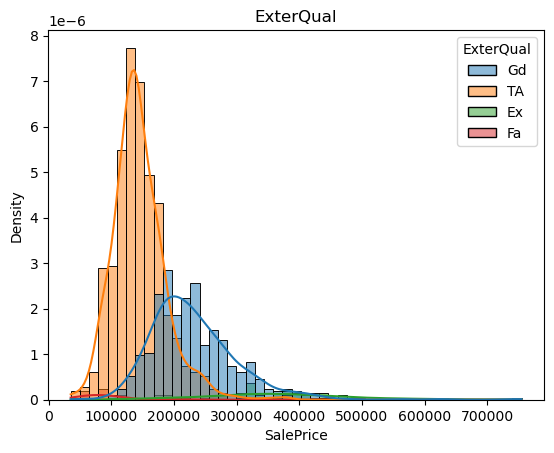

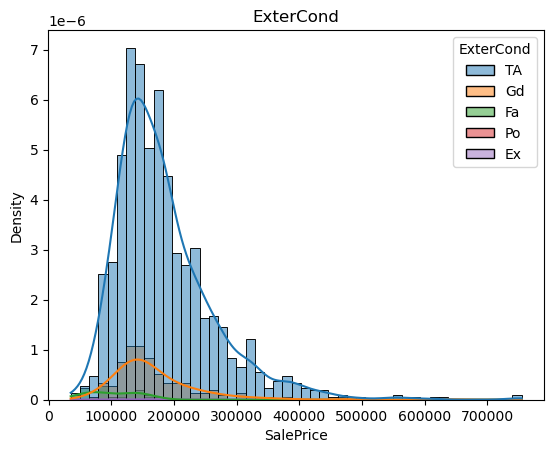

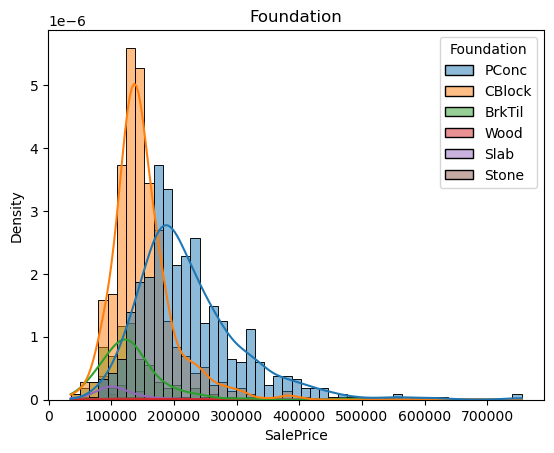

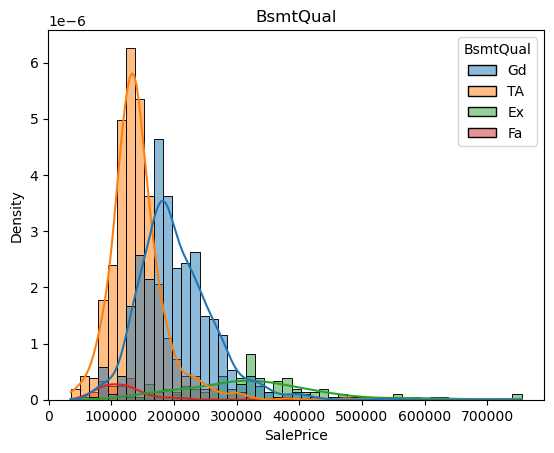

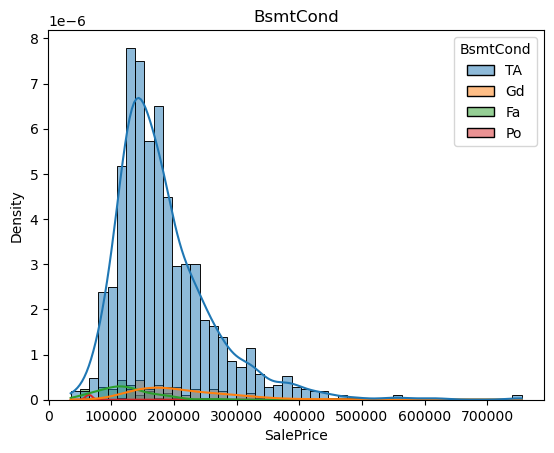

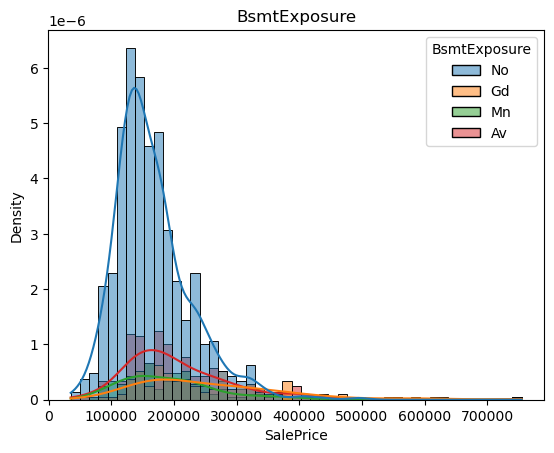

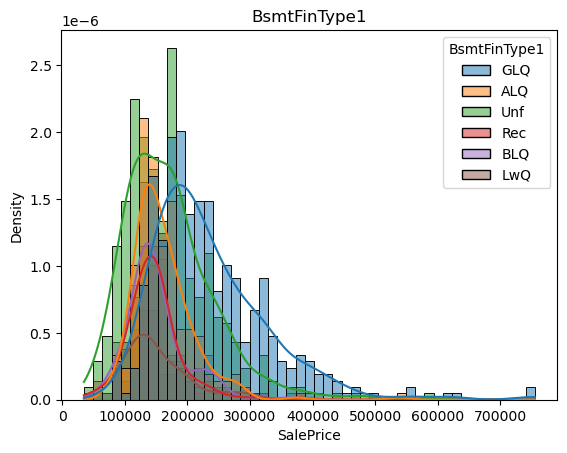

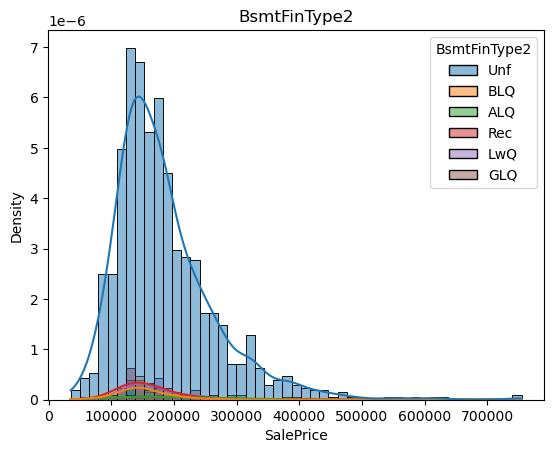

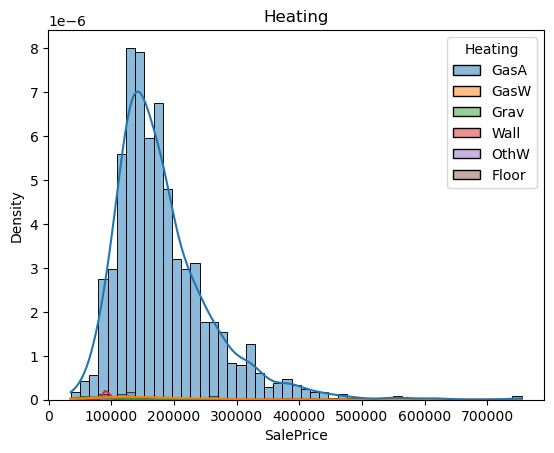

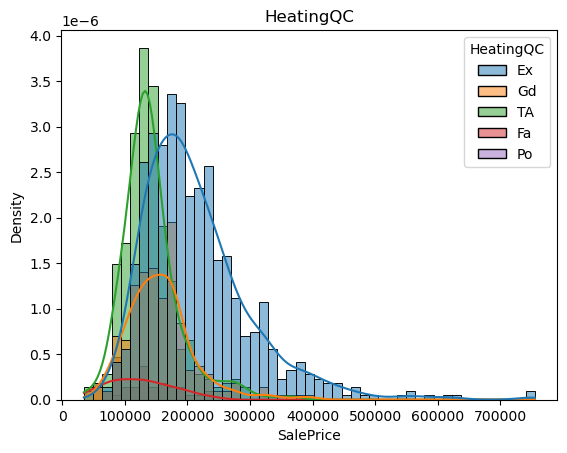

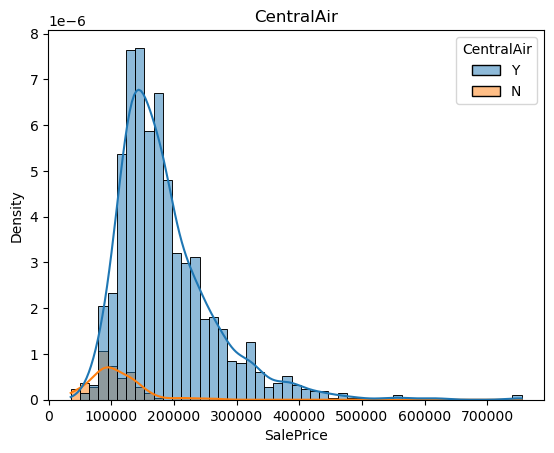

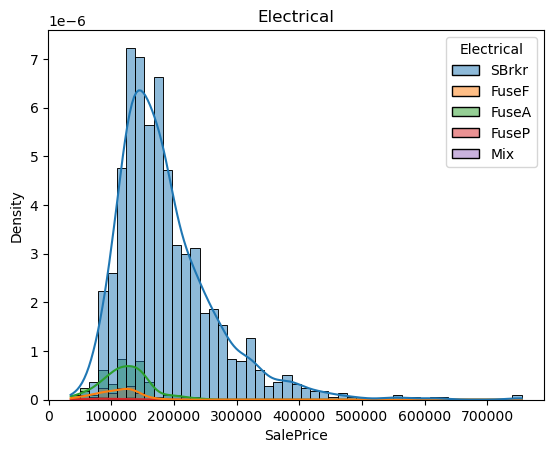

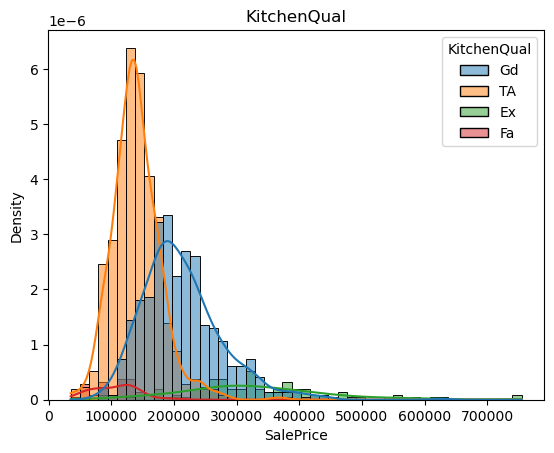

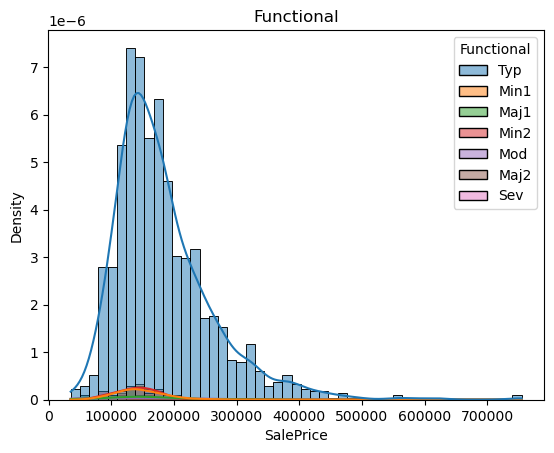

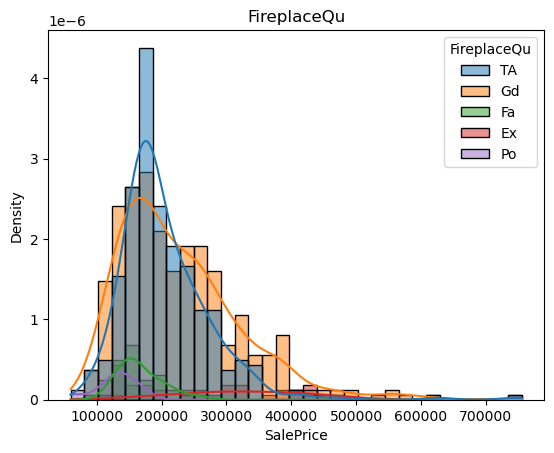

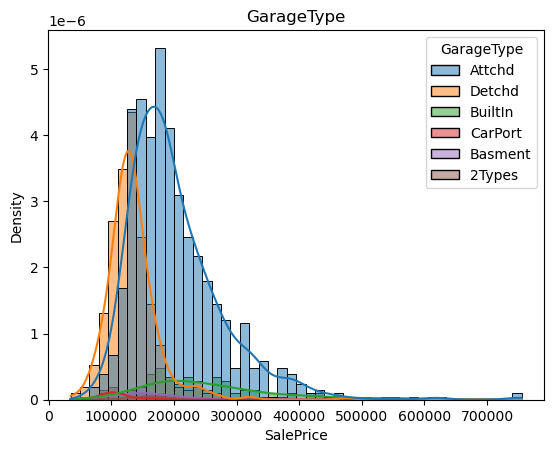

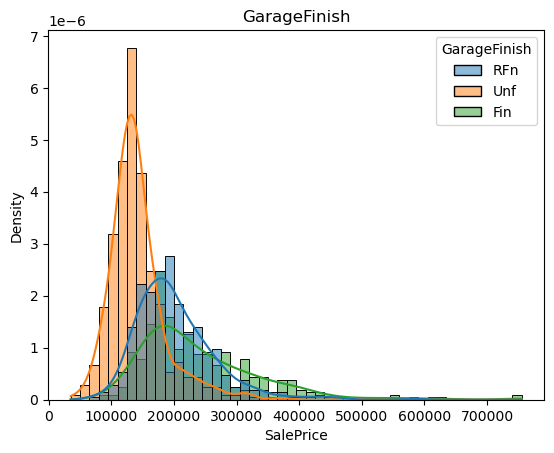

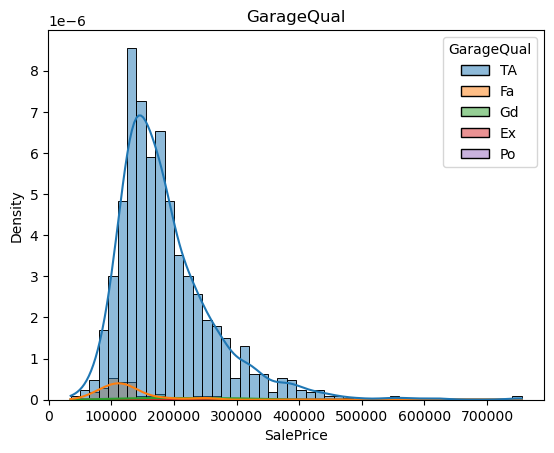

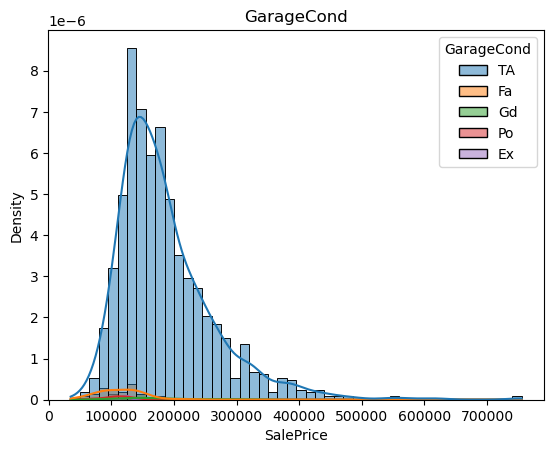

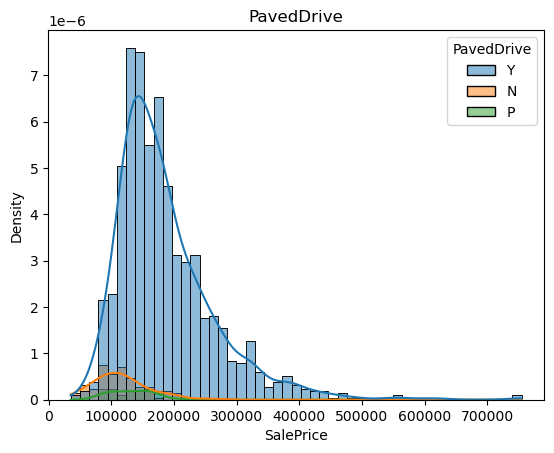

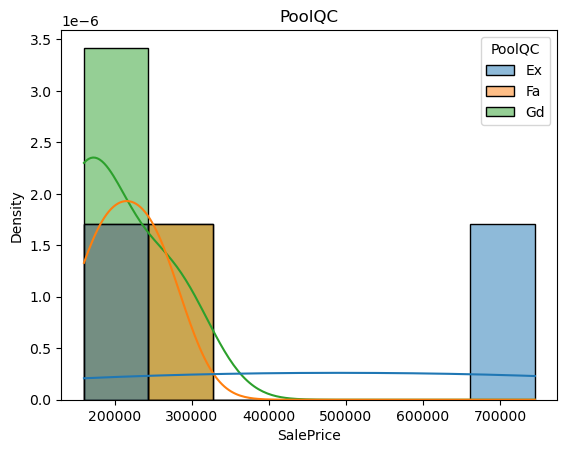

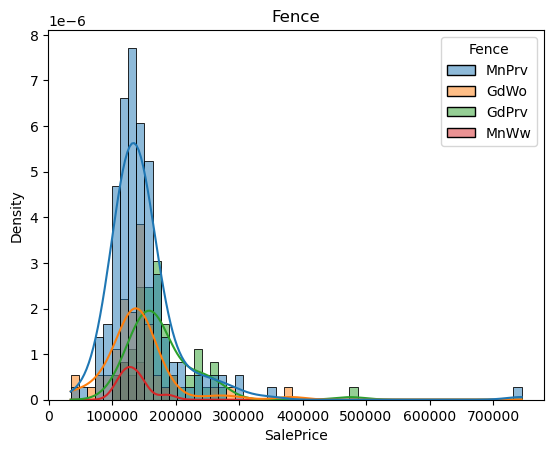

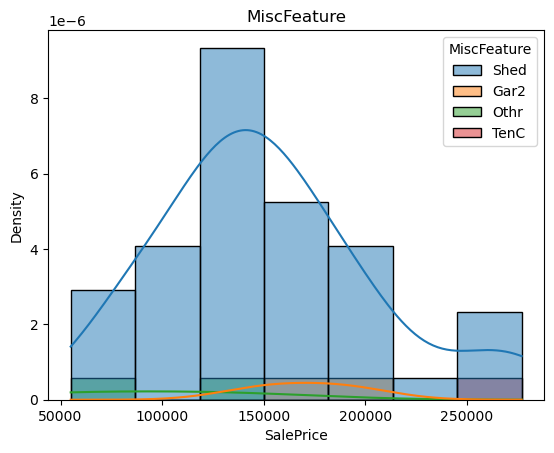

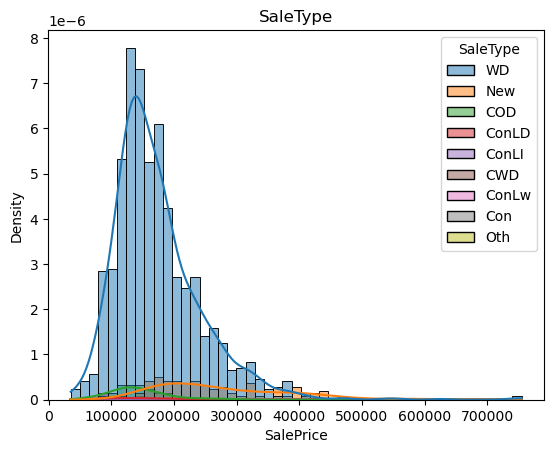

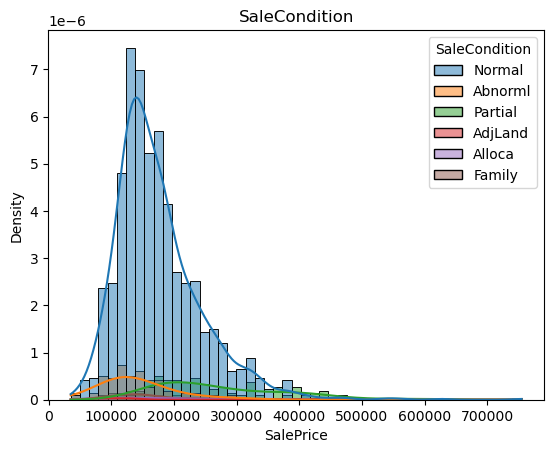

In [33]:
"""
for col in df_eda.select_dtypes(['object']):
    plt.figure()
    sns.histplot(data=df_eda, x='SalePrice', kde=True, stat="density", hue=col)
    plt.title(col)
"""

##### Basement / Target

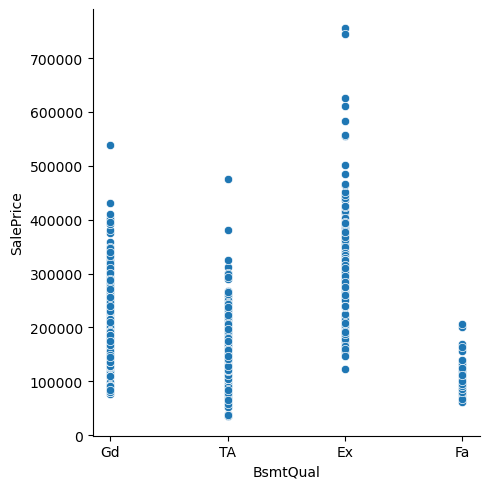

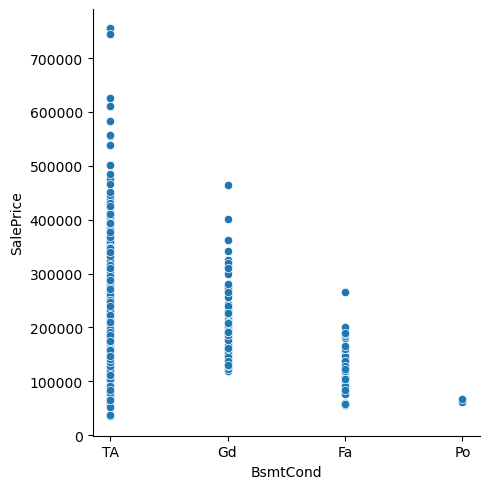

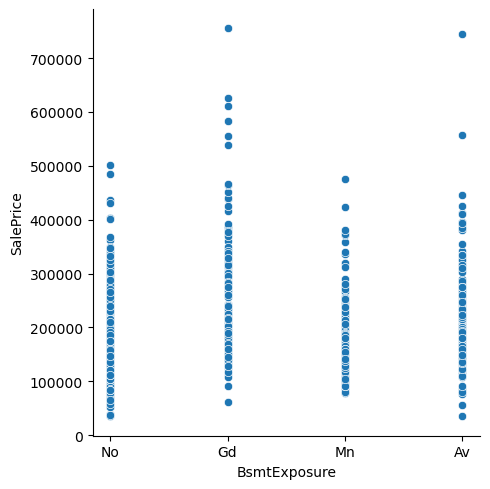

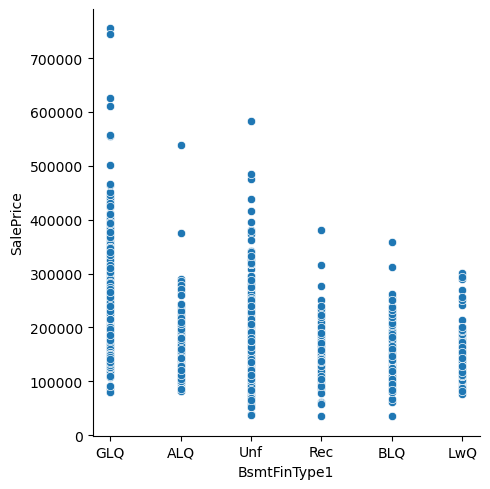

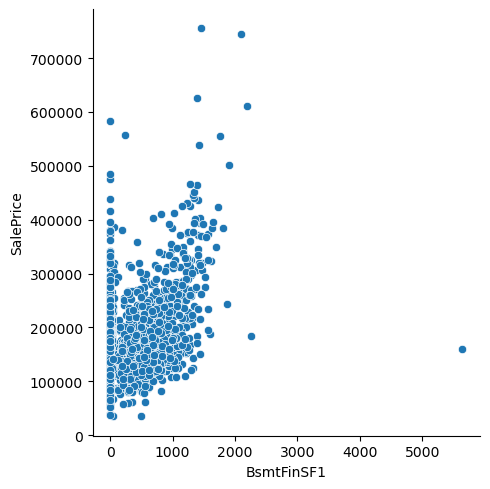

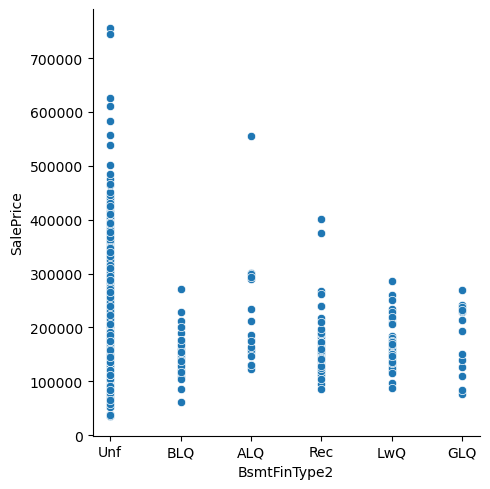

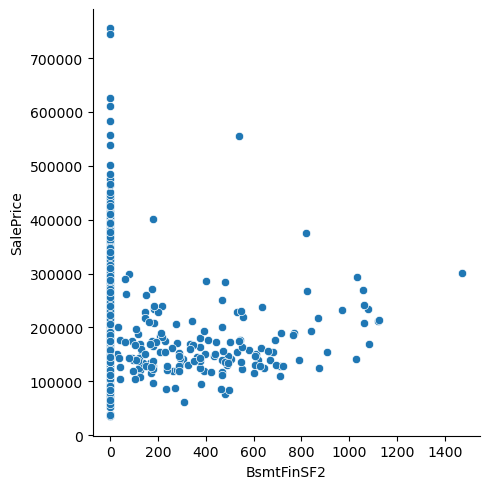

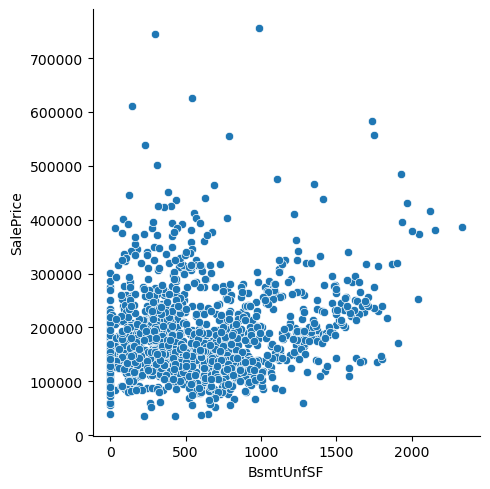

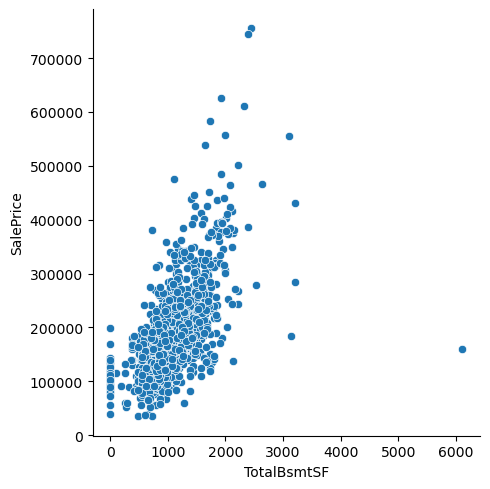

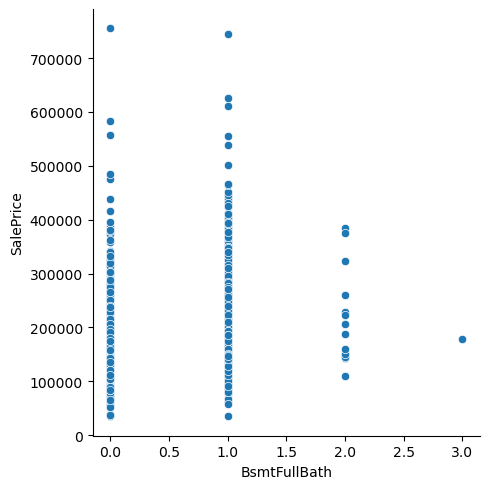

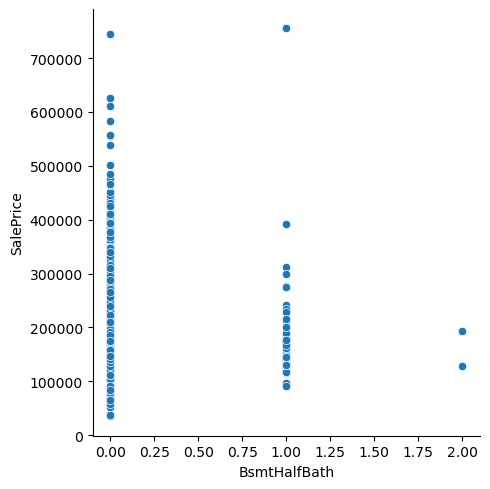

In [34]:
for col in basement:
    sns.relplot(data=df_eda, x=col, y='SalePrice')

Seems to have influence :
- BsmtQual
- BsmtCond
- BsmtFinSF1
- BsmtFinType2 (Unf + GLQ/other)
- BsmtFinSF2
- BsmtFinType2 (Unf/other)
- TotalBsmtSF
- BsmtHalfBath

##### Garage/Target

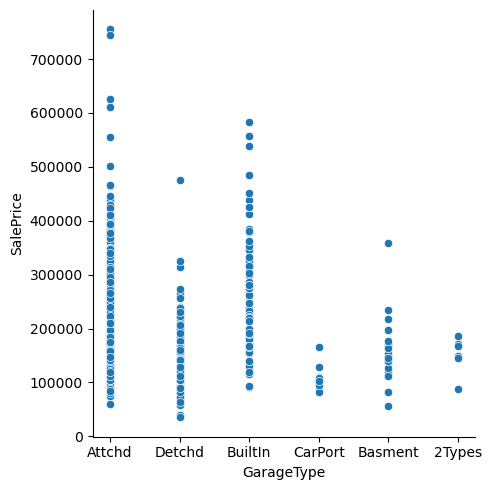

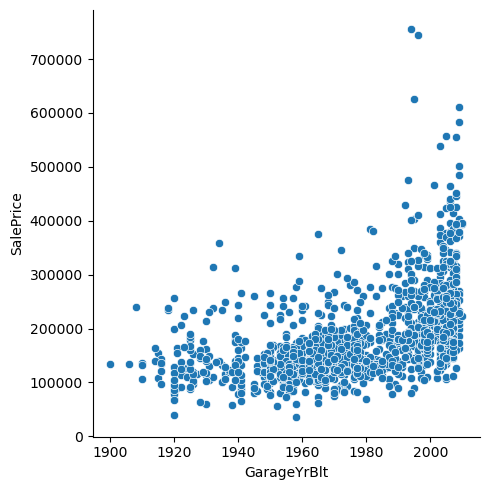

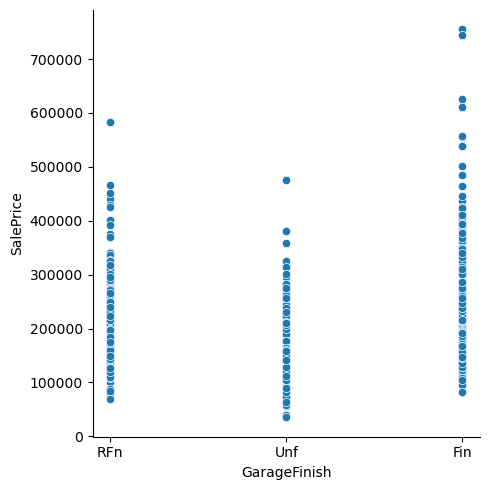

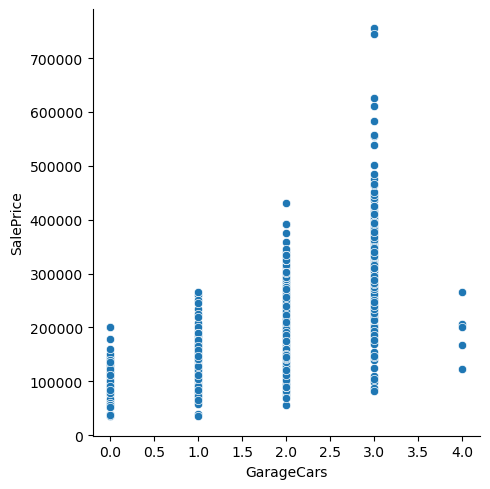

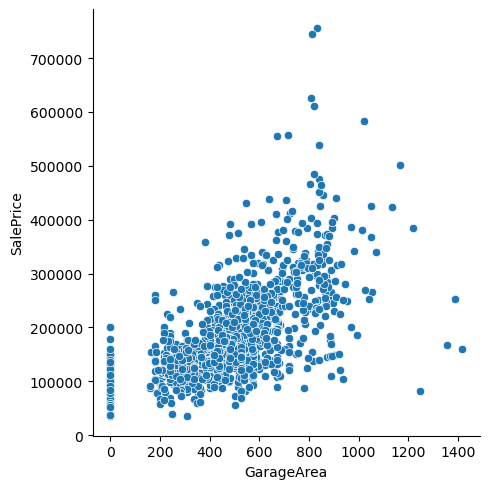

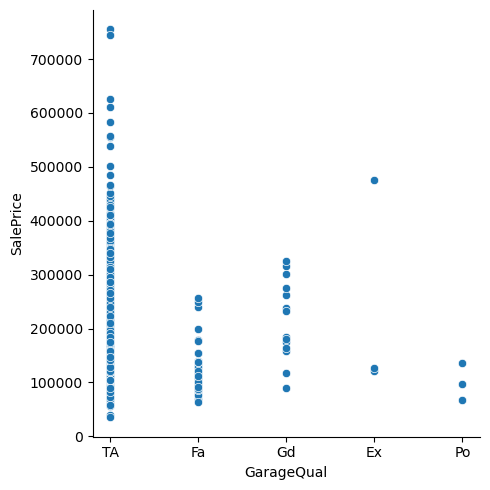

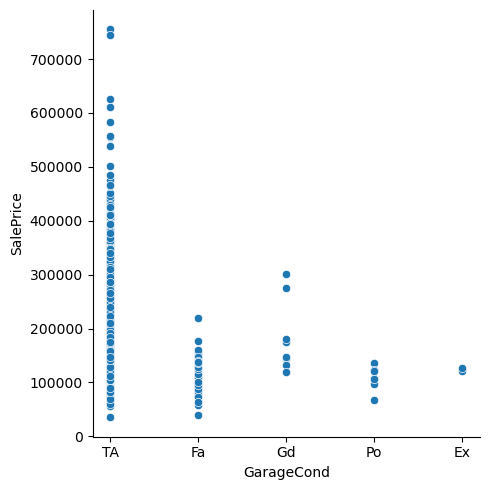

In [35]:
for col in garage:
    sns.relplot(data=df_eda, x=col, y='SalePrice')

Seems to have an influence :
- GarageType
- GarageCars
- GarageArea

### Advenced EDA
#### Relation Var/Var

In [ ]:
Exterior1st and Exterior2nd are the same ?

In [ ]:
pairplot